# Random Dataset + GPU


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mitchell-Mirano/sorix/blob/develop/docs/examples/clustering/RandomDataset+GPU.ipynb)
[![Open in GitHub](https://img.shields.io/badge/Open%20in-GitHub-black?logo=github)](https://github.com/Mitchell-Mirano/sorix/blob/develop/docs/examples/clustering/RandomDataset+GPU.ipynb)
[![Open in Docs](https://img.shields.io/badge/Open%20in-Docs-blue?logo=readthedocs)](http://127.0.0.1:8000/sorix/examples/clustering/RandomDataset+GPU)

In [1]:
#Uncomment the next line and run this cell to install sorix
#!pip install 'sorix @ git+https://github.com/Mitchell-Mirano/sorix.git@qa'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sorix
from sorix.clustering import Kmeans

In [3]:
device = 'cuda' if sorix.cuda.is_available() else 'cpu'
device

✅ GPU basic operation passed
✅ GPU available: NVIDIA GeForce RTX 4070 Laptop GPU
CUDA runtime version: 13000
CuPy version: 14.0.1


'cuda'

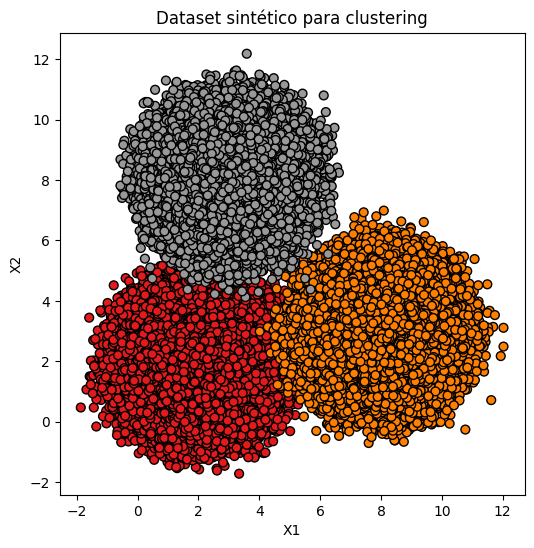

In [4]:
# Semilla para reproducibilidad
np.random.seed(42)

# Parámetros
n_clusters = 3
samples_per_cluster = 1000000

# Centros de los clústeres (puedes cambiarlos)
centros = np.array([
    [2, 2],
    [8, 3],
    [3, 8]
])

# Desviación estándar de los clústeres
std = 0.8

# Genera los puntos
X = []
y = []
for label, centro in enumerate(centros):
    puntos = np.random.randn(samples_per_cluster, 2) * std + centro
    X.append(puntos)
    y.append(np.full(samples_per_cluster, label))

# Unimos todos los puntos y etiquetas
X = np.vstack(X)
y = np.concatenate(y)

# Visualización rápida
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Set1", s=40, edgecolor='k')
plt.title("Dataset sintético para clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [5]:
X_train = sorix.tensor(X, device=device)
X_train

tensor([[2.39737132, 1.88938856],
        [2.51815083, 3.21842389],
        [1.8126773 , 1.81269043],
        ...,
        [3.56752298, 8.4546417 ],
        [2.8109625 , 7.1025456 ],
        [4.49822372, 7.9792028 ]], device='cuda:0', dtype=sorix.float64)

In [6]:
kmeans = Kmeans(n_clusters=n_clusters)
kmeans.fit(X_train)